In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

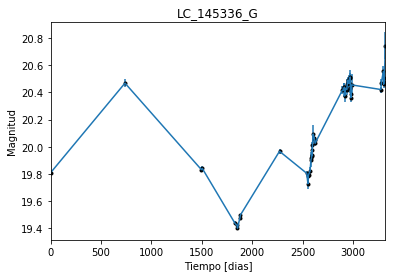

In [2]:
data = np.genfromtxt('LC_145336_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_145336_G')
plt.savefig("LC_145336_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

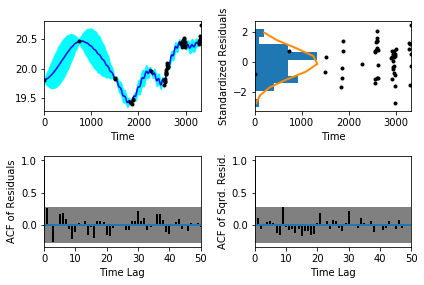

In [5]:
sample.assess_fit()

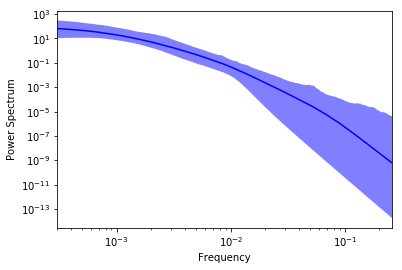

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

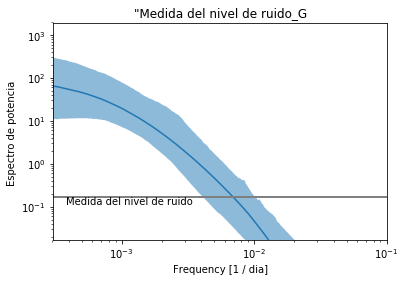

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_145336_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_145336_G')

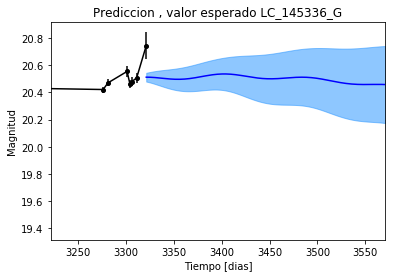

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_145336_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_145336_G')

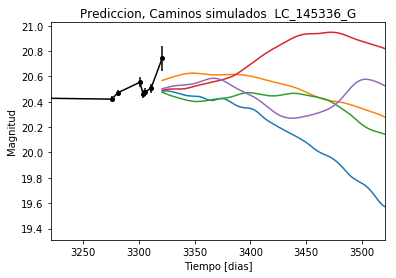

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_145336_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


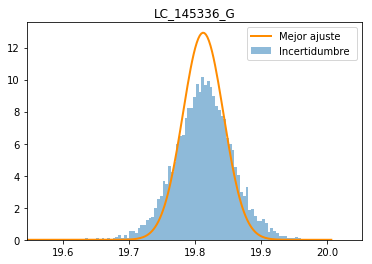

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_145336_G')
plt.savefig("Mejor_ajuste_LC_145336_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_145336_G')

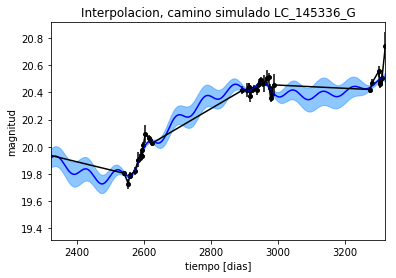

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_145336_G')

Text(0.5,1,'Interpolacion, camino simulado LC_145336_G')

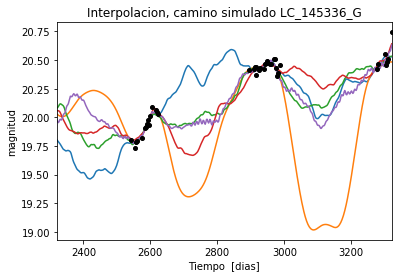

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_145336_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 467.193469453
Median: 0.0107829713622
Standard deviation: 0.0991277376908
68% credibility interval: [ 0.00133891  0.11106227]
95% credibility interval: [ 0.00039108  0.38423409]
99% credibility interval: [  3.12124039e-04   4.88740287e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 554.246111867
Median: 0.0025339256517
Standard deviation: 0.033115163219
68% credibility interval: [ 0.00048963  0.0138979 ]
95% credibility interval: [ 0.00031983  0.10110657]
99% credibility interval: [ 0.00030531  0.24408944]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 805.010666586
Median: 0.00994060737557
Standard deviation: 0.1282207

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1121.88989809
Median: 87.6630656849
Standard deviation: 1.85892141408
68% credibility interval: [ 85.62337967  89.02513516]
95% credibility interval: [ 82.7126439   89.82324242]
99% credibility interval: [ 80.58654425  90.63207499]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1245.98293969
Median: 0.432794818208
Standard deviation: 1.13760337253
68% credibility interval: [ 0.04783882  2.21164264]
95% credibility interval: [ 0.01347714  3.91951852]
99% credibility interval: [ 0.00944398  4.56299076]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 304.664989791
Median: 0.197091543499
Standard deviation: 1.91675508248
68% credibility interval: [ 0.01104709  2.11798319]
95% credibility interval: [  2.81041152e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 841.329995385
Median: 1.38262757366e-23
Standard deviation: 1.81479559242e+50
68% credibility interval: [  1.42826782e-70   3.14557725e-05]
95% credibility interval: [  4.66527886e-178   1.09155579e+019]
99% credibility interval: [  7.25247896e-189   3.61551825e+031]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2721.98491654
Median: 20.0669975008
Standard deviation: 0.183519231418
68% credibility interval: [ 19.91285953  20.22432945]
95% credibility interval: [ 19.71308059  20.4404289 ]
99% credibility interval: [ 19.5287379   20.63880238]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 235.510361986
Median: 0.007350167906
Standard deviation: 0.115235770819
68% credibility interval: [ 0.          0.15703416]
95% credibility interval: [ 0.          0.42256421]
99% credibility interval: [ 0.          0.49020005]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 235.510361986
Median: 0.007350167906
Standard deviation: 0.115235770819
68% credibility interval: [ 0.          0.15703416]
95% credibility interval: [ 0.          0.42256421]
99% credibility interval: [ 0.          0.49020005]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1053.84630138
Median: 0.0
Standard deviation: 0.000460705824015
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1121.88989809
Median: 87.6630656849
Standard deviation: 1.85892141408
68% credibility interval: [ 85.62337967  89.02513516]
95% credibility interval: [ 82.7126439   89.82324242]
99% credibility interval: [ 80.58654425  90.63207499]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1907.39904239
Median: 0.142690771856
Standard deviation: 0.147907672424
68% credibility interval: [ 0.08737277  0.25161659]
95% credibility interval: [ 0.05956463  0.52347769]
99% credibility interval: [ 0.04838326  0.95224676]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1659.89422703
Median: 1.07806314462
Standard deviation: 0.183952499381
68% credibility interval: [ 0.91339466  1.26885423]
95% credibility interval: [ 0.78734832  1.51562656]
99% credibility interval: [ 0.72450071  1.67819318]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1426.53756539
Median: 0.000169923222468
Standard deviation: 0.00305527901916
68% credibility interval: [  5.14164661e-06   2.08926952e-03]
95% credibility interval: [  1.00359508e-23   8.48087368e-03]
99% credibility interval: [  1.07672799e-36   1.37889549e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 467.193469453
Median: (-0.0677514072307+0j)
Standard deviation: 0.955077054797
68% credibility interval: [-0.69782481+0.j         -0.00841265-0.01197692j]
95% credibility interval: [-2.41421399+0.j         -0.00245722-0.07100114j]
99% credibility interval: [ -3.07084579e+00+0.j          -1.96113318e-03-1.70684038j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 554.246111867
Median: (-0.0159211244242+0j)
Standard deviation: 0.753350955201
68% credibility interval: [-0.08732308+0.j -0.00307642+0.j]
95% credibility interval: [-0.63527129+1.20792496j -0.00200956+0.j        ]
99% credibility interval: [-1.53365916+2.22508312j -0.00191834+0.j        ]
Posterior summary for parameter ar_roots  element 2
--------------------